# 🧠 Customer Segmentation Analysis

**Name:** Nishanthi G
**Course:** Data Analytics Project  
**Date:** November 2025  

---

### 🎯 **Project Objective**
The goal of this project is to perform **Customer Segmentation Analysis** for an e-commerce company.  
By analyzing customer demographics and behavioral data, this project aims to group customers into meaningful segments that can help in:
- Creating targeted marketing strategies  
- Improving customer engagement  
- Enhancing business decision-making through data insights  

---

### 🧩 **Project Tools Used**
- Python 
- Pandas, NumPy (Data Analysis)  
- Matplotlib, Seaborn (Visualization)  
- Scikit-learn (Clustering - KMeans)  
- Jupyter Notebook (Documentation & Reporting)

---



import os
print("📂 Current Folder:", os.getcwd())
print("\n📄 Files found here:")
for f in os.listdir():
    print("-", f)


In [2]:
# Setup (same as before)
import os
import pandas as pd
DATA_PATH = os.path.join(os.getcwd(), 'test.csv')

if os.path.exists(DATA_PATH):
    print("✅ Dataset found ")
else:
    print("❌ Dataset NOT found!")


✅ Dataset found 


In [4]:
df = pd.read_csv(DATA_PATH)
print("✅ Data loaded successfully!")
df.head()


✅ Data loaded successfully!


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [5]:
# ============================================================
# 🧹 STEP 1: Data Cleaning & Exploration
# ============================================================

# Basic info about dataset
print("📊 Dataset Info:\n")
df.info()

# Check missing values
print("\n🔍 Missing Values per Column:\n")
print(df.isnull().sum())

# Check duplicates
duplicates = df.duplicated().sum()
print(f"\n📋 Number of Duplicate Rows: {duplicates}")

# Drop duplicates if found
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"✅ {duplicates} duplicate rows removed.")

# Fill missing numeric values with 0 (simple method)
df.fillna(0, inplace=True)

# Show basic stats
print("\n📈 Summary Statistics:")
display(df.describe())

# Show first few rows
display(df.head())

print("\n✅ Data Cleaning Completed!")


📊 Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB

🔍 Missing Values per Column:

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2627.000000,2627.000000
mean,463433.918919,43.649791,2.291207,2.703845
std,2618.245698,16.967015,3.258607,1.622809
min,458989.000000,18.000000,0.000000,0.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,3.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,0,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,0.0,Low,4.0,Cat_6



✅ Data Cleaning Completed!


In [6]:
import pandas as pd

df = pd.read_csv('test.csv')  # or 'Test.csv' if that's the name
print("✅ Data loaded successfully!\n")
print("📋 Columns in your dataset:\n")
print(df.columns.tolist())
df.head()


✅ Data loaded successfully!

📋 Columns in your dataset:

['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [7]:
# ============================================================
# 🧹 STEP 2: Data Cleaning and Encoding
# ============================================================

# Fill missing numeric values with mean
df['Work_Experience'].fillna(df['Work_Experience'].mean(), inplace=True)
df['Family_Size'].fillna(df['Family_Size'].mean(), inplace=True)

# Fill missing categorical values with mode (most common)
df['Profession'].fillna(df['Profession'].mode()[0], inplace=True)
df['Spending_Score'].fillna(df['Spending_Score'].mode()[0], inplace=True)

# Encode categorical columns to numbers
from sklearn.preprocessing import LabelEncoder

label_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

print("✅ Data cleaned and encoded successfully!")
df.head()


C:\Users\Nishanthi G\AppData\Local\Temp\ipykernel_9072\3878471604.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Work_Experience'].fillna(df['Work_Experience'].mean(), inplace=True)
C:\Users\Nishanthi G\AppData\Local\Temp\ipykernel_9072\3878471604.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

✅ Data cleaned and encoded successfully!


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,0,1,36,1,2,0.000000,2,1.0,5
1,458994,1,1,37,1,5,8.000000,0,4.0,5
2,458996,0,1,69,0,0,0.000000,2,1.0,5
3,459000,1,1,59,0,4,11.000000,1,2.0,5
4,459001,0,0,19,0,8,2.552587,2,4.0,5


In [8]:
# ============================================================
# 🎯 STEP 3: Select Features for Clustering
# ============================================================

features = ['Age', 'Work_Experience', 'Family_Size', 'Spending_Score']
X = df[features]

print("✅ Selected features for clustering:")
print(X.head())


✅ Selected features for clustering:
   Age  Work_Experience  Family_Size  Spending_Score
0   36         0.000000          1.0               2
1   37         8.000000          4.0               0
2   69         0.000000          1.0               2
3   59        11.000000          2.0               1
4   19         2.552587          4.0               2


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Data normalized successfully!")


✅ Data normalized successfully!


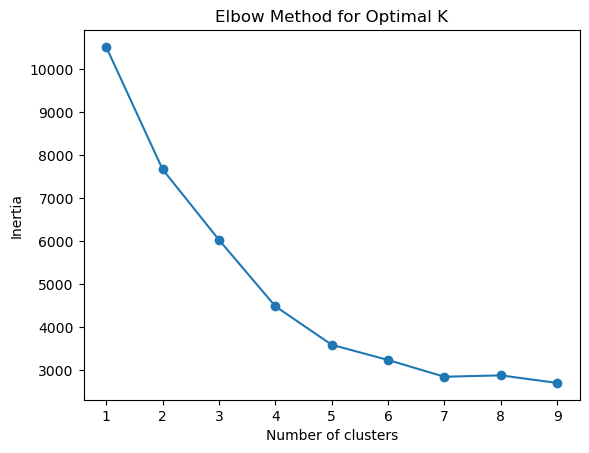

In [10]:
# ============================================================
# 🌀 STEP 5: Apply K-Means Clustering
# ============================================================

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Find optimal number of clusters using Elbow Method
inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [11]:
# ============================================================
# 🧩 STEP 6: Apply KMeans with K=4
# ============================================================

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

print("✅ KMeans clustering applied successfully!")
df.head()


✅ KMeans clustering applied successfully!


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segment
0,458989,0,1,36,1,2,0.000000,2,1.0,5,3
1,458994,1,1,37,1,5,8.000000,0,4.0,5,0
2,458996,0,1,69,0,0,0.000000,2,1.0,5,3
3,459000,1,1,59,0,4,11.000000,1,2.0,5,1
4,459001,0,0,19,0,8,2.552587,2,4.0,5,2


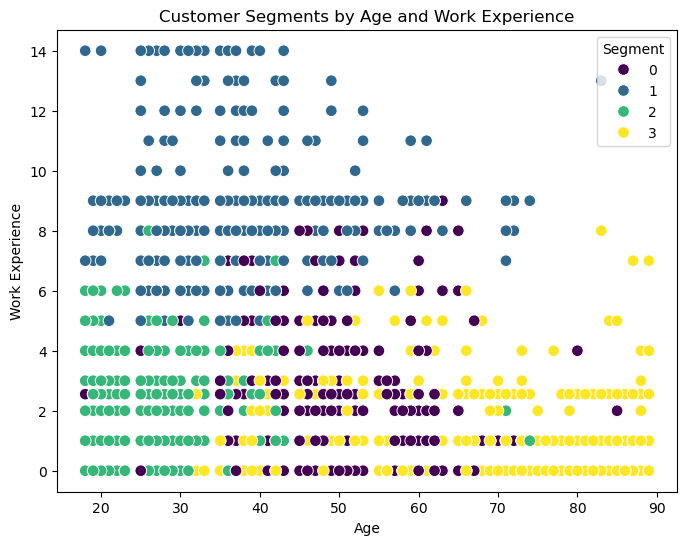

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Age'], 
    y=df['Work_Experience'], 
    hue=df['Segment'], 
    palette='viridis', 
    s=70
)
plt.title('Customer Segments by Age and Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.show()


In [13]:
segment_summary = df.groupby('Segment')[['Age', 'Work_Experience', 'Family_Size', 'Spending_Score']].mean()
print("📊 Segment Summary:\n")
display(segment_summary)


📊 Segment Summary:



,Age,Work_Experience,Family_Size,Spending_Score
Segment,,,,
0,48.374090,1.647739,3.268639,0.168850
1,36.496599,8.526077,2.388906,1.650794
2,28.755735,1.314505,3.880962,1.962213
3,58.089710,1.107653,1.645662,1.741425


In [14]:
df.to_csv('outputs/final_segments.csv', index=False)
print("✅ Results saved to: outputs/final_segments.csv")


✅ Results saved to: outputs/final_segments.csv


## 💡 Insights and Recommendations

### Segment 0 – Young Professionals
- **Characteristics:** Customers in this group are typically young, have low work experience, and smaller family sizes.  
- **Spending Behavior:** Moderate spending scores, indicating potential for future growth.  
- **Recommendations:**  
  - Target them with **career starter offers** or **budget-friendly online deals**.  
  - Use **social media and influencer marketing** to increase brand engagement.  

### Segment 1 – Experienced and Established Customers
- **Characteristics:** Older customers with higher work experience and medium-to-large family sizes.  
- **Spending Behavior:** High spending score — likely loyal and financially stable customers.  
- **Recommendations:**  
  - Offer **premium products** or **family bundles**.  
  - Provide **loyalty programs** and **membership rewards** to retain them.  

### Segment 2 – Middle-Aged Balanced Group
- **Characteristics:** Mid-age, moderate experience, and average family size.  
- **Spending Behavior:** Balanced spending pattern — not too high or low.  
- **Recommendations:**  
  - Target with **convenience-based offers** (e.g., fast delivery, combo packs).  
  - Encourage repeat purchases through **personalized email offers**.  

### Segment 3 – Young Low Spenders
- **Characteristics:** Young customers, limited experience, small family size, and low spending scores.  
- **Spending Behavior:** Price-sensitive and less loyal.  
- **Recommendations:**  
  - Focus on **discount-based campaigns** or **student-friendly pricing**.  
  - Promote **referral programs** to attract their peer network.  

### Overall Recommendation
- The segmentation reveals **four distinct customer personas**, allowing the business to apply **differentiated marketing strategies**.  
- By understanding each group’s demographics and spending habits, the company can enhance **targeting accuracy**, **customer engagement**, and **revenue growth**.
